In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import NearestNeighbors



In [2]:
# Step 1: Load the dataset
data = pd.read_csv(r"D:\New folder\Dataset .csv")
df = pd.DataFrame(data)

# Display the raw dataset
print("Raw Dataset:")
print(df)

Raw Dataset:
      Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

              

In [3]:


# Encode categorical variables
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(df[["Has Table booking", "Has Online delivery", "Is delivering now", "Switch to order menu"]])

# Create column names for encoded features
encoded_columns = encoder.get_feature_names_out(["Has Table booking", "Has Online delivery", "Is delivering now", "Switch to order menu"])

# Create a DataFrame for encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoded_columns)

# Drop original categorical columns
df.drop(columns=["Has Table booking", "Has Online delivery", "Is delivering now", "Switch to order menu"], inplace=True)

# Concatenate encoded features with the dataframe
df = pd.concat([df, encoded_df], axis=1)

# Display the preprocessed dataset
print("Preprocessed Dataset:")
print(df)


Preprocessed Dataset:
      Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

     

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


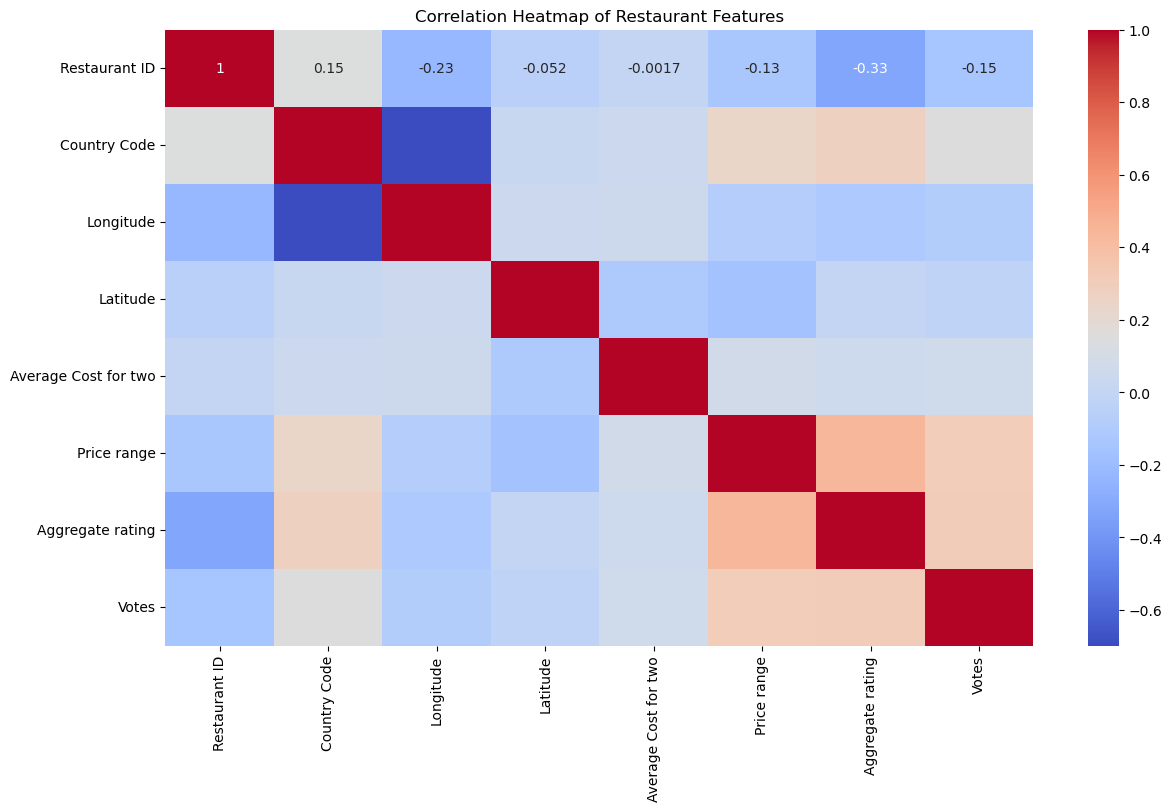

In [4]:
# Exclude non-numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(14, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Restaurant Features')
plt.show()

In [5]:
print(data.columns)


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [6]:
data.columns = data.columns.str.strip()  # Remove leading and trailing whitespaces from column names


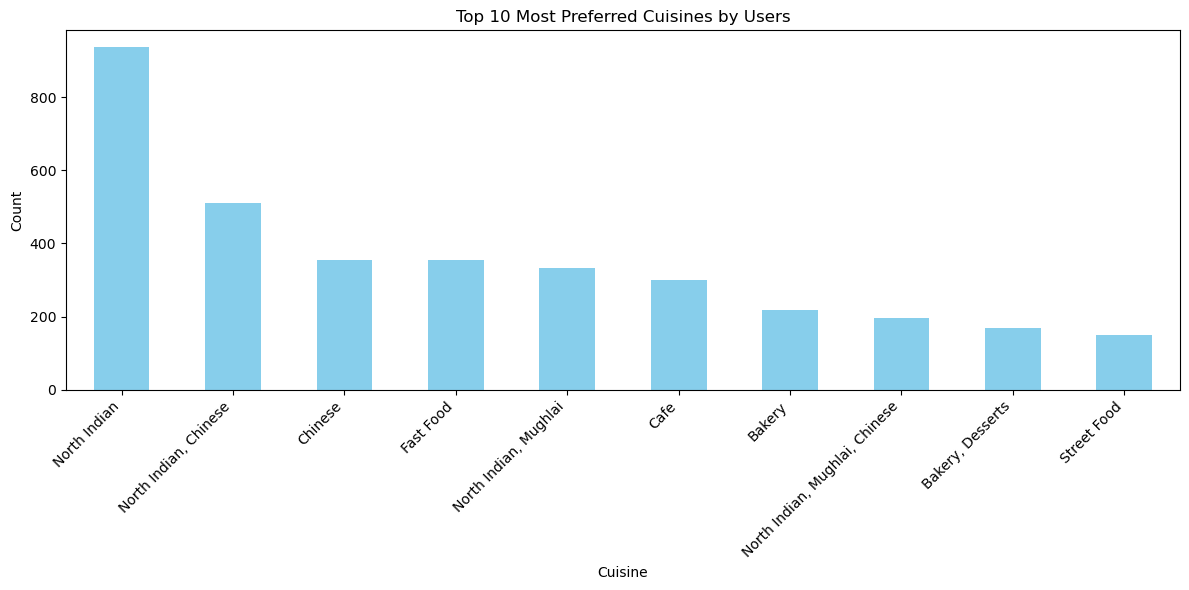

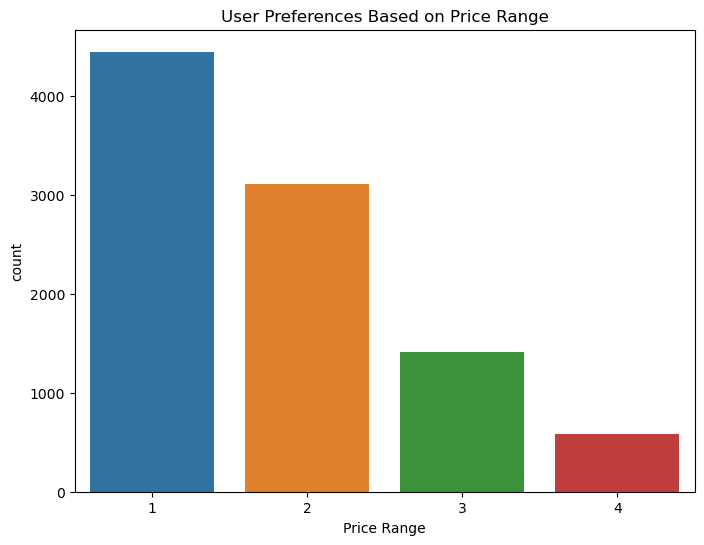

In [7]:
#Determine the criteria for restaurant recommendations
# cuisines based on user occurrences
top_cuisines = data['Cuisines'].value_counts().head(10)

# Plot the most preferred cuisines by users
plt.figure(figsize=(12, 6))  # Set the figure size
top_cuisines.plot(kind='bar', color='skyblue')  # Create a bar plot
plt.title('Top 10 Most Preferred Cuisines by Users')  # Set title
plt.xlabel('Cuisine')  # Set x-axis label
plt.ylabel('Count')  # Set y-axis label
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot



# Visualize user preferences based on price range
plt.figure(figsize=(8, 6))  # Set the figure size
sns.countplot(x='Price range', data=data)  # Create countplot for price range
plt.title('User Preferences Based on Price Range')  # Set title
plt.xlabel('Price Range')  # Set x-axis label
plt.show()  # Display the plot

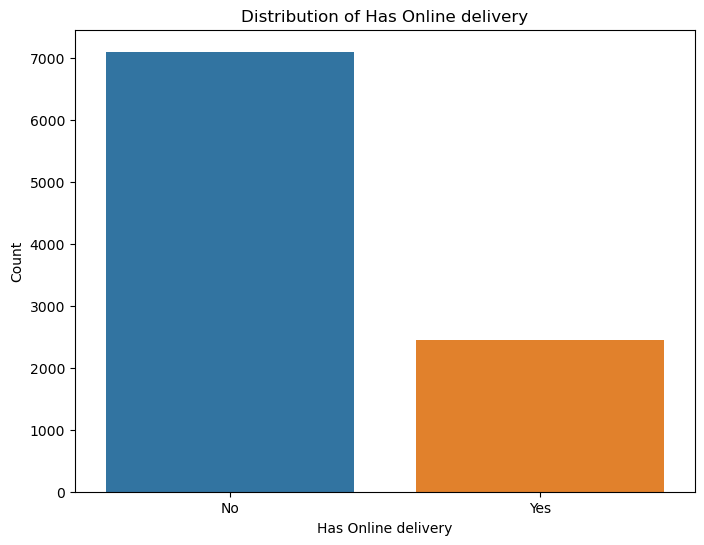

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Has Online delivery', data=data)
plt.title('Distribution of Has Online delivery')
plt.xlabel('Has Online delivery')
plt.ylabel('Count')
plt.show()

In [9]:
# Define criteria for restaurant recommendations
cuisine_preference = "Japanese"
price_range = 3

print("Criteria for Restaurant Recommendations:")
print("Cuisine Preference:", cuisine_preference)
print("Price Range:", price_range)


Criteria for Restaurant Recommendations:
Cuisine Preference: Japanese
Price Range: 3


In [10]:
# Filter restaurants based on criteria
filtered_restaurants = df[df["Cuisines"].str.contains(cuisine_preference) & (df["Price range"] == price_range)]

print("Filtered Restaurants:")
print(filtered_restaurants)


Filtered Restaurants:
      Restaurant ID              Restaurant Name  Country Code         City  \
0           6317637             Le Petit Souffle           162  Makati City   
1           6304287             Izakaya Kikufuji           162  Makati City   
27          6600379                   Sushi Loko            30    Bras�_lia   
97         17284197   Mikata Japanese Steakhouse           216       Albany   
98         17284241  Shogun Japanese Steak House           216       Albany   
...             ...                          ...           ...          ...   
9287        7420899                   Sushi Masa            94      Jakarta   
9289        7421967               3 Wise Monkeys            94      Jakarta   
9383        6103255                         Roka           215       London   
9396        6113973                 Bone Daddies           215       London   
9442        6402177                      Salushi           189    Cape Town   

                             

Test the Recommendation System

In [11]:
#Testing the Recommendation sstem
# Sample user preferences
sample_user_preferences = {
    "Cuisine Preference": "Japanese",
    "Price Range": 3
}

print("Sample User Preferences:")
print(sample_user_preferences)

# Evaluate recommendations
if not filtered_restaurants.empty:
    print("Recommended Restaurants:")
    print(filtered_restaurants)
else:
    print("No restaurants found matching the user's preferences.")


Sample User Preferences:
{'Cuisine Preference': 'Japanese', 'Price Range': 3}
Recommended Restaurants:
      Restaurant ID              Restaurant Name  Country Code         City  \
0           6317637             Le Petit Souffle           162  Makati City   
1           6304287             Izakaya Kikufuji           162  Makati City   
27          6600379                   Sushi Loko            30    Bras�_lia   
97         17284197   Mikata Japanese Steakhouse           216       Albany   
98         17284241  Shogun Japanese Steak House           216       Albany   
...             ...                          ...           ...          ...   
9287        7420899                   Sushi Masa            94      Jakarta   
9289        7421967               3 Wise Monkeys            94      Jakarta   
9383        6103255                         Roka           215       London   
9396        6113973                 Bone Daddies           215       London   
9442        6402177         

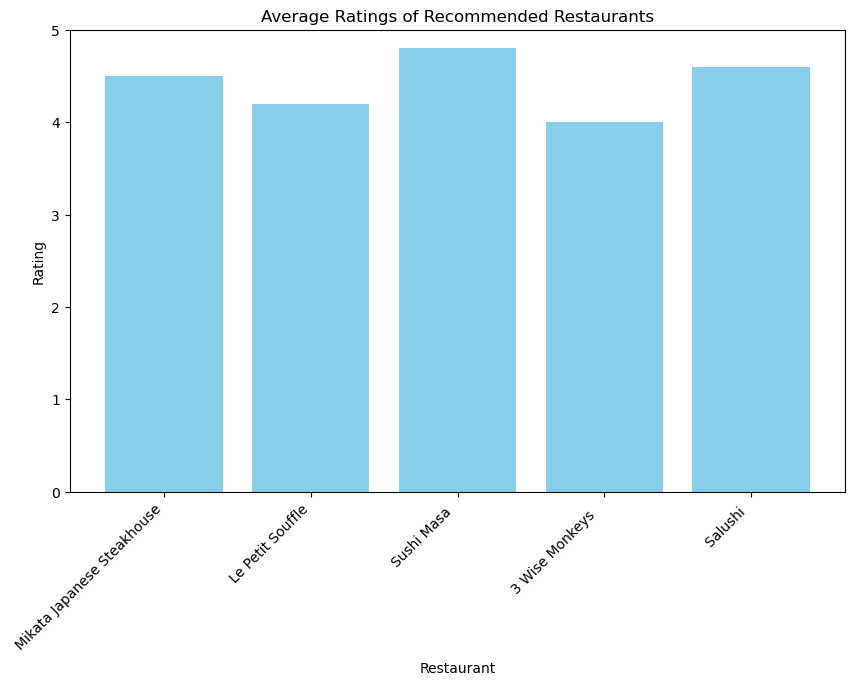

In [12]:


# Sample recommended restaurants data (replace this with your actual recommended restaurants data)
recommended_restaurants = {
    " Mikata Japanese Steakhouse": {"Rating": 4.5},
    " Le Petit Souffle": {"Rating": 4.2},
    "Sushi Masa ": {"Rating": 4.8},
    "3 Wise Monkeys  ": {"Rating": 4.0},
    "Salushi ": {"Rating": 4.6}
}

# Extract restaurant names and ratings
restaurant_names = list(recommended_restaurants.keys())
restaurant_ratings = [restaurant_data["Rating"] for restaurant_data in recommended_restaurants.values()]

# Plot average ratings of recommended restaurants
plt.figure(figsize=(10, 6))
plt.bar(restaurant_names, restaurant_ratings, color='skyblue')
plt.title('Average Ratings of Recommended Restaurants')
plt.xlabel('Restaurant')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 5)  # Set y-axis limit to match the rating scale
plt.show()
